In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

**Function Definition**

These fucntions will be used throughout the three simulations

In [ ]:
# fucntion to update the distribution plots
def plot_arms(x, distribution_arm1, distribution_arm2):
  clear_output(wait = True)
  plt.plot(x,distribution_arm1)
  plt.plot(x,distribution_arm2)
  plt.pause(0.00001)
  


# fucntion to update the distribution parameters (alpha and beta)
def updateDistributions(alpha, beta, reward):
  alpha = alpha + reward
  beta = beta + (1 - reward)
  return alpha, beta


# fucntion to perform one iteration of Thompson Sampling
def thompsonSample(sample_arm1, sample_arm2, alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean):
  if sample_arm1 > sample_arm2:
    reward_options = [0,1]
    reward = np.random.choice(reward_options, 1, p=[1-arm_1_mean, arm_1_mean])
    alpha_arm1, beta_arm1 = updateDistributions(alpha_arm1, beta_arm1, reward)

  else:
    reward_options = [0,1]
    reward = np.random.choice(reward_options, 1, p=[1-arm_2_mean, arm_2_mean])
    alpha_arm2, beta_arm2 = updateDistributions(alpha_arm2, beta_arm2, reward)
  
  return alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward


# fucntion to perform one iteration of Sampling with Uniform Random
def uniformRandom(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean):
  arm_random = random.choice([0,1])
  if arm_random == 0:
    reward_options = [0,1]
    reward = np.random.choice(reward_options, 1, p=[1-arm_1_mean, arm_1_mean])
    alpha_arm1, beta_arm1 = updateDistributions(alpha_arm1, beta_arm1, reward)
  else:
    reward_options = [0,1]
    reward = np.random.choice(reward_options, 1, p=[1-arm_2_mean, arm_2_mean])
    alpha_arm2, beta_arm2 = updateDistributions(alpha_arm2, beta_arm2, reward)  
  
  return alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward


# function to calculate and print the final estimated means for arm 1 and arm 2 and total reward
def printFinalResults(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, total_reward):
  calc_mean_arm1 = alpha_arm1/(alpha_arm1 + beta_arm1)
  calc_mean_arm2 = alpha_arm2/(alpha_arm2 + beta_arm2)
  print("calculated arm 1 mean = ", calc_mean_arm1)
  print("calculated arm 2 mean = ", calc_mean_arm2)
  print("total reward = ", total_reward)
  print("alpha arm1 = ", alpha_arm1)
  print("alpha arm2 = ", alpha_arm2)
  print("beta arm1 = ", beta_arm1)
  print("beta arm2 = ", beta_arm2)

**Simualation Parameters**

These parameters wil be used by each algorithm so we can compare performance. Performance metrics we are using are the accuracy of the predicted mean and the total reward. 

In [ ]:
# define the true means 
arm_1_mean = 0.215
arm_2_mean = 0.230

# define c threshold (only used by TS-PostDiff)
c = 0.004

**Thompson Sampling Simulation**

The arms are sampled, and the arm with the larger sampled value is chosen. 

Expected Results

- total reward will be maximized, being close to the higher mean
- the arm with the higher mean will be chosen more, so it will have a taller curve
- the arm with the lower mean will be chosen signifiacntly less and therefore the calculated mean will not be accurate




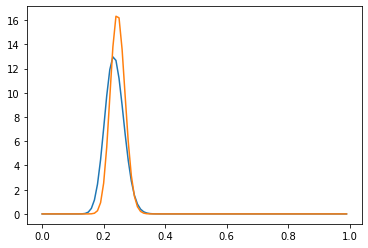

calculated arm 1 mean =  [0.23560209]
calculated arm 2 mean =  [0.24610592]
total reward =  [122]
alpha arm1 =  [45]
alpha arm2 =  [79]
beta arm1 =  [146]
beta arm2 =  [242]


In [ ]:
# initialize distribution: arm 1
alpha_arm1 = 1
beta_arm1 = 1

# initialize distribution: arm 2
alpha_arm2 = 1
beta_arm2 = 1

# initialize total reward
total_reward = 0

# plot initial figure
plt.ion()
fig = plt.figure()
x = np.arange (0, 1, 0.01)
distribution_arm1 = beta.pdf(x, alpha_arm1, beta_arm1)
distribution_arm2 = beta.pdf(x, alpha_arm2, beta_arm2)
plot_arms(x, distribution_arm1, distribution_arm2)

# run 100 iterations of the experiemnt
for i in range(508):
  #sample each distribution
  sample_arm1 = np.random.beta(alpha_arm1, beta_arm1, 1)
  sample_arm2 = np.random.beta(alpha_arm2, beta_arm2, 1)
  
  # choose arm and update distributions using TS
  alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward = thompsonSample(sample_arm1, sample_arm2, alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean)
  
  # update total reward
  total_reward = total_reward + reward

  # update plot
  distribution_arm1_TS = beta.pdf(x, alpha_arm1, beta_arm1)
  distribution_arm2_TS = beta.pdf(x, alpha_arm2, beta_arm2)
  plot_arms(x, distribution_arm1_TS, distribution_arm2_TS)

printFinalResults(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, total_reward)



**TS-PostDiff Simulation** 

The arms are sampled, and if the diference in the samples is less than threshold c, the arm is chosen randomly. If the difference is larger than the threshold, the arms are chosen with Thompson sampling (ie. the arm with the larger smapled value is chosen). 

Expected Results

- Total reward would be closer to the higher mean, but not as high as pure TS
- The calculated mean of the arm with a lower true mean, wil be more accurate than pure TS, but not as accurate as uniform random


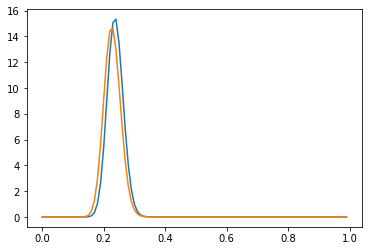

calculated arm 1 mean =  [0.23809524]
calculated arm 2 mean =  [0.22821577]
total reward =  [118]
alpha arm1 =  [65]
alpha arm2 =  [55]
beta arm1 =  [208]
beta arm2 =  [186]


In [ ]:
# initialize distribution: arm 1 
alpha_arm1 = 1
beta_arm1 = 1

# initialize distribution: arm 2
alpha_arm2 = 1
beta_arm2 = 1

# initialize total reward
total_reward = 0

# plot initial figure
plt.ion()
fig = plt.figure()
x = np.arange (0, 1, 0.01)
distribution_arm1 = beta.pdf(x, alpha_arm1, beta_arm1)
distribution_arm2 = beta.pdf(x, alpha_arm2, beta_arm2)
plot_arms(x, distribution_arm1, distribution_arm2)

# run 100 iterations of the experiemnt
for i in range(510):
  #sample each distribution
  sample_arm1 = np.random.beta(alpha_arm1, beta_arm1, 1)
  sample_arm2 = np.random.beta(alpha_arm2, beta_arm2, 1)

  if abs(sample_arm1-sample_arm2)<=c:
      alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward = uniformRandom(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean)
  else:
      alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward = thompsonSample(sample_arm1, sample_arm2, alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean)

  # update total reward
  total_reward = total_reward + reward

  # update plot
  distribution_arm1_TSPD = beta.pdf(x, alpha_arm1, beta_arm1)
  distribution_arm2_TSPD = beta.pdf(x, alpha_arm2, beta_arm2)
  plot_arms(x, distribution_arm1_TSPD, distribution_arm2_TSPD)

printFinalResults(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, total_reward)



**Uniform Random Simulation**

Each arm is sampled randomly with a 50-50 chance. 

Expected Results

- The reward should be about halfway between the two means
- the calculated means will both be fairly accurate sicne they are sampled equally

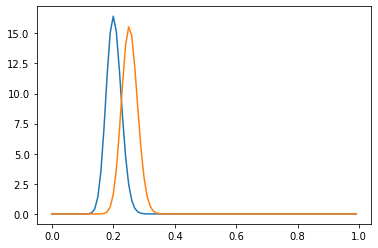

calculated arm 1 mean =  [0.20220588]
calculated arm 2 mean =  [0.25347222]
total reward =  [126]
alpha arm1 =  [55]
alpha arm2 =  [73]
beta arm1 =  [217]
beta arm2 =  [215]


In [ ]:
# define initial beta distribution: arm 1
alpha_arm1 = 1
beta_arm1 = 1

# define initial beta distribution: arm 2
alpha_arm2 = 1
beta_arm2 = 1

# initialize total reward
total_reward = 0

# plot initial figure
plt.ion()
fig = plt.figure()
x = np.arange (0, 1, 0.01)
distribution_arm1 = beta.pdf(x, alpha_arm1, beta_arm1)
distribution_arm2 = beta.pdf(x, alpha_arm2, beta_arm2)
plot_arms(x, distribution_arm1, distribution_arm2)

# run 100 iterations of the experiemnt
for i in range(556):
  alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, reward = uniformRandom(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, arm_1_mean, arm_2_mean)
  
  # update total reward
  total_reward = total_reward + reward

  # update plot
  distribution_arm1_UR = beta.pdf(x, alpha_arm1, beta_arm1)
  distribution_arm2_UR = beta.pdf(x, alpha_arm2, beta_arm2)
  plot_arms(x, distribution_arm1_UR, distribution_arm2_UR)

printFinalResults(alpha_arm1, beta_arm1, alpha_arm2, beta_arm2, total_reward)



Generate a figure with the threee final plots side by side

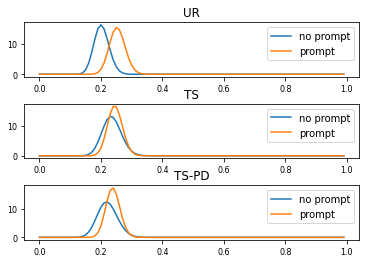

In [ ]:

ax1 = plt.subplot(3, 1, 1)
ax1.set_title('UR')
x = np.arange(0, 1, 0.01)
ax1.plot(x, distribution_arm1_UR, label='no prompt')
ax1.plot(x, distribution_arm2_UR, label='prompt')
ax1.tick_params(axis='both', labelsize=8)
ax1.legend()

ax1 = plt.subplot(3, 1, 2)
ax1.set_title('TS')
x = np.arange(0, 1, 0.01)
ax1.plot(x, distribution_arm1_TS, label='no prompt')
ax1.plot(x, distribution_arm2_TS, label='prompt')
ax1.tick_params(axis='both', labelsize=8)
ax1.legend()

ax1 = plt.subplot(3, 1, 3)
ax1.set_title('TS-PD')
x = np.arange(0, 1, 0.01)
ax1.plot(x, distribution_arm1_TSPD, label='no prompt')
ax1.plot(x, distribution_arm2_TSPD, label='prompt')
ax1.tick_params(axis='both', labelsize=8)
ax1.legend()

plt.subplots_adjust(hspace=0.5)
plt.savefig('beta_dist.png')
plt.show()
